# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# imports

import math 
import numpy as np
import pandas as pd

In [0]:
# sales list.
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [3]:
# mean of sales list.
sales_sum = sum(sales)
sales_mean = sales_sum/len(sales)
sales_mean

3052.714285714286

In [4]:
# calculate variance for sales.
sales_variance = []
for val in sales:
    sales_variance.append((val - sales_mean)**2)

variance = sum(sales_variance)/len(sales)

variance

183761.06122448976

In [5]:
# lecture example of variance calculation.

def subtract_mean(number):
    return number-sales_mean

distance = list(map(subtract_mean, sales))

squared_distance = list(map(lambda x:x**2, distance))

variance_of_sales = sum(squared_distance)/len(sales)
variance_of_sales

183761.06122448976

In [6]:
# calculate the standard deviation of sales.

sales_dev = variance**.5
sales_dev

428.67360686714756

In [7]:
# my function for calculating variance and std.

def my_var_std(mylist):
    '''
    input list to return variance and standard deviation.
    '''
    sales_variance = []
    for val in mylist:
        sales_variance.append((val - sales_mean)**2)
    variance = sum(sales_variance) / len(sales_variance)
    
    my_std = (variance**.5)
    return variance, my_std

my_var_std(sales)

(183761.06122448976, 428.67360686714756)

In [8]:
# check answer with numpy.

np.var(sales)

183761.06122448976

In [9]:
# check answer with numpy.

np.std(sales)

428.67360686714756

REMEMBER.
Pandas assumes the input is a sample, have to specify if its a population.

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# people entering list.

people = [127, 80, 105, 92, 120, 115, 93]

In [11]:
# calculate the covariance of sales vs people.

co_var = np.cov(sales, people)
co_var

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [12]:
# output as data frame.

pd.DataFrame(co_var)

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


In [13]:
# making pd dataframe with both lists.

sales_people = pd.DataFrame({'Sales':sales,
                             'People': people})
sales_people

,Sales,People
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [14]:
# using pandas function to find covariance.

sales_people.cov()

,Sales,People
Sales,214387.904762,7604.357143
People,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# calcualte the std using pandas (axis=0 b/c this is the population not a sample)

std_s = sales_people['Sales'].std(axis=0)
std_p = sales_people['People'].std(axis=0)

![correlation coefficient formula](https://www.statisticshowto.com/wp-content/uploads/2012/12/sample-correlation-coefficient.png)

In [16]:
# calcualt the denominator for correlation coefficient.

denom = std_s*std_p
denom

7897.890309308459

In [17]:
# calcualte the numerator (sample/population covarience).
cov_sp = sales_people['Sales'].cov(sales_people['People'])
cov_sp

7604.357142857142

In [18]:
# calculate the correlation coefficient.

cor_coeff = cov_sp/denom
cor_coeff

0.9628339778148909

In [19]:
# check correlationm coefficient using pandas.

sales_people['Sales'].corr(sales_people['People'])

0.9628339778148909

when one group increses the other increases aswell.

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
# read in data and inspect.

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

titanic = pd.read_csv(url)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1310 non-null   int64  
 1   pclass            1309 non-null   float64
 2   survived          1309 non-null   float64
 3   name              1309 non-null   object 
 4   sex               1309 non-null   object 
 5   age               1310 non-null   float64
 6   sibsp             1309 non-null   float64
 7   parch             1309 non-null   float64
 8   ticket            1309 non-null   object 
 9   fare              1308 non-null   float64
 10  cabin             295 non-null    object 
 11  embarked          1310 non-null   object 
 12  boat              486 non-null    object 
 13  body              121 non-null    float64
 14  home.dest         745 non-null    object 
 15  has_cabin_number  1310 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory 

In [21]:
# find covariance matrix using pandas.

titanic_cov = titanic.cov()
titanic_cov

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [22]:
# find correlation coefficient matrix using pandas

titanic_corr = titanic.corr()
titanic_corr

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


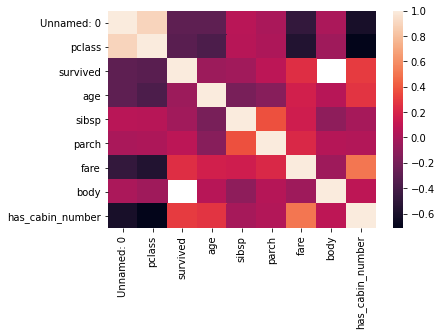

In [23]:
# simple heat map visualization.

import seaborn as sns

sns.heatmap(titanic_corr);

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [24]:
# make two random vectors
u = np.random.randn(2)
w = np.random.randn(2)

print(u, w)

[0.25850216 0.35761717] [-1.00661469 -0.12516063]


In [25]:
# create orthogonality vecor.

y = u - u.dot(w) * w/np.linalg.norm(w)**2
y

array([-0.0398529 ,  0.32052025])

In [26]:
# check orthognality. 

np.dot(w,y)

-1.1796119636642288e-16

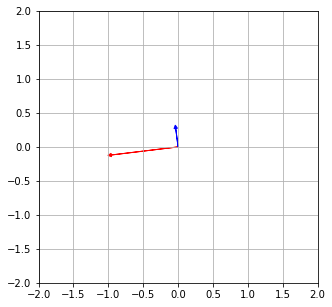

In [27]:
# plot.

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-2,2)
plt.ylim(-2,2)
b = np.array(w)
y = np.array(y)

for vec, mycolor in ([b, 'red'], [y,'blue']):
    plt.arrow(0,0,
              vec[0],
              vec[1],
              head_width=.05,
              head_length=.05,
              color=mycolor,
              length_includes_head=True)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [28]:
a = [-5, 3, 7]
b = [6, -8, 2]

a = np.array(a)
b = np.array(b)
np.dot(a,b)

# not orthogonal, dot product !=0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [[2], [-15], [6], [20]]
c_array = np.array(c)


In [30]:
norm_c =np.linalg.norm(c)
norm_c**2

665.0

In [31]:
c2 = np.array([2, -15, 6, 20])
c2.dot(c2)

665

In [32]:
c_array.T.dot(c_array)

array([[665]])

In [33]:
np.matmul(c_array.T,c_array)

array([[665]])

# Unit Vectors

---

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

let *i* =  (1,0) *j* = (0,1). then *d* = 7i + 12j

let $i_$= (1,0,0), *j* = (0,1,0), and *k* = (0,0,1). then *e* = (2i + 11j -8z)




---


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [34]:
f = np.array([4, 12, 11, 9, 2])

f_norm = np.linalg.norm(f)

f_hat = f/f_norm
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [35]:
vector_1 = np.array([[0, 0, 0, .25,.5,.75],[0., 0.,  0.,  0.5, 1.,  1.5]])
vector_1


array([[0.  , 0.  , 0.  , 0.25, 0.5 , 0.75],
       [0.  , 0.  , 0.  , 0.5 , 1.  , 1.5 ]])

(0.0, 2.0)

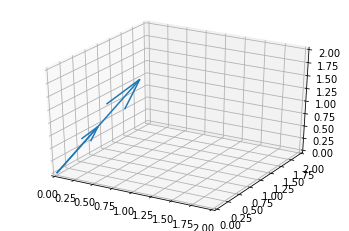

In [36]:
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z, U, V, W = zip(*vector_1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W,)
ax.set_ylim([0,2])
ax.set_xlim([0,2])
ax.set_zlim([0,2])

In [0]:
vector_2 = np.array([[0, 0, 0, .56,.87,.21],[0., 0.,  0.,  0.5, 1.,  1.5]])

(0.0, 2.0)

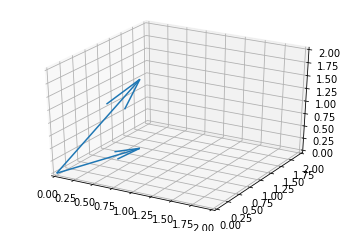

In [38]:
X, Y, Z, U, V, W = zip(*vector_2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W,)
ax.set_ylim([0,2])
ax.set_xlim([0,2])
ax.set_zlim([0,2])

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The set of all possible linear combinations (i.e., all possible values of a and b) is the span of these vectors.
A set of vectors spans a space if their linear combinations fill the space.
The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear).

In [0]:
g = [1, 2]
h = [4, 8]

In [40]:
spans = []
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(g,a) + np.multiply(h,b)
    spans.append(linear_combo)
print(spans)

[array([14, 28]), array([24, 48]), array([34, 68]), array([44, 88])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [56]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]


lmn =[[1,2,3],[-1,0,7],[4,8,2]]
lmn
np.linalg.matrix_rank(lmn)
      

3

In [42]:
spans = []
for (a,b,c) in [(2,3,4), (5,6,7), (6,7,8)]:
    linear_combo = np.multiply(l,a) + np.multiply(m,b) + np.multiply(n,c)
    spans.append(linear_combo)
print(spans)

[array([15, 36, 35]), array([27, 66, 71]), array([31, 76, 83])]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



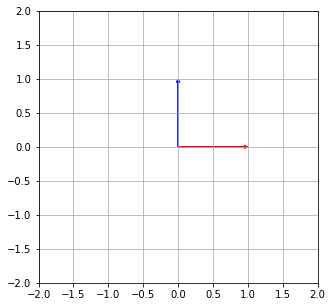

In [43]:
basis_1 = np.array([1,0])
basis_2 = np.array([0,1])

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-2,2)
plt.ylim(-2,2)


for bas, mycolor in ([basis_1, 'red'], [basis_2,'blue']):
    plt.arrow(0,0,
              bas[0],
              bas[1],
              head_width=.05,
              head_length=.05,
              color=mycolor,
              length_includes_head=True)


## 6.2 What does it mean to form a basis?

the defult units for crating any vector 

2D = 

[1, 0]

[0,1], 

3D = 

[1,0,0]

[0,1,0]

[0,0,1]

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [44]:
p = np.array([[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]])

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

Rank means the number of dimensions in the output of a matrix that's used for linear transformation

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1, 3])
w = np.array([-1, 2])

In [46]:
w_dot_v = np.dot(w, v)
v_dot_v = np.dot(v, v)
print(w_dot_v)

5


In [47]:
fraction = w_dot_v/v_dot_v
x= np.multiply(fraction,v)
x

array([0.5, 1.5])

In [0]:
x = np.multiply(fraction, v)

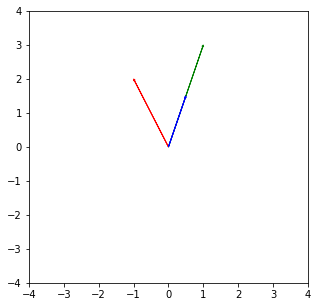

In [49]:
fig, axes = plt.subplots(1, 1, figsize=(5,5))
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Plot the Scaled Vectors
plt.arrow(0,0, w[0], w[1],head_width=.05, head_length=0.05, color ='red', length_includes_head=True)
plt.arrow(0,0, v[0], v[1],head_width=.05, head_length=0.05, color ='green', length_includes_head=True)

plt.arrow(0,0, x[0], x[1],head_width=.05, head_length=0.05, color ='blue', length_includes_head=True)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

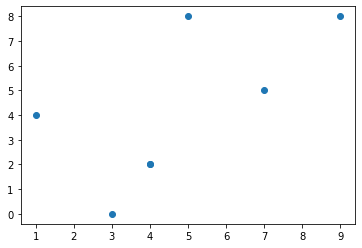

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()